# C1 - Introduction to Human and Computer Vision
## Week 4

In [2]:
import os
import re
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np

# Get project's root directory
BASE_PATH = os.path.join(re.search(r'.+(Team5)', os.getcwd())[0], 'week4')
os.chdir(BASE_PATH)
BASE_PATH

DATA_DIRECTORY = '../data'

In [4]:
# Read pickle file to see detailed info of the images augmentation
with open(f'{DATA_DIRECTORY}/qsd1_w4/augmentations.pkl', 'rb') as f:
    augmentations_info = pickle.load(f)

### a) Remove background, detect noise (and filter it)

In [ ]:
from src.background_removal import background_removal
from src.noise_removal import denoise_image
from tqdm import tqdm

# Image names
QSD1_w4_names = [f for f in os.listdir(f'{DATA_DIRECTORY}/qsd1_w4/') if f.endswith('.jpg')]
QSD1_w4_names.sort()

# Initialize datasets
BBDD = []
QSD1_w4 = []
QSD1_w4_filtered = []
QSD1_w4_nonAugmented = []

# Load datasets (+ filter)
for image_name in tqdm(QSD1_w4_names):
    # Read QSD1_w4
    image_bgr = cv2.imread(f'{DATA_DIRECTORY}/qsd1_w4/{image_name}')
    image_qsd1 = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    QSD1_w4.append(image_qsd1)

    # Read non-augmented image
    image_bgr = cv2.imread(f'{DATA_DIRECTORY}/qsd1_w4/non_augmented/{image_name}')
    image_nonAugmented = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    image_nonAug_bckg_remov = background_removal(image_nonAugmented)  # Remove background in non-augmented image
   
    QSD1_w4_nonAugmented.append(image_nonAug_bckg_remov)

    # Filter image from QSD1_w4
    filtered_image = background_removal(denoise_image(image_qsd1))  # Detect noise (and clean it) + Remove background

    QSD1_w4_filtered.append(filtered_image)

100%|██████████| 30/30 [04:37<00:00,  9.27s/it]


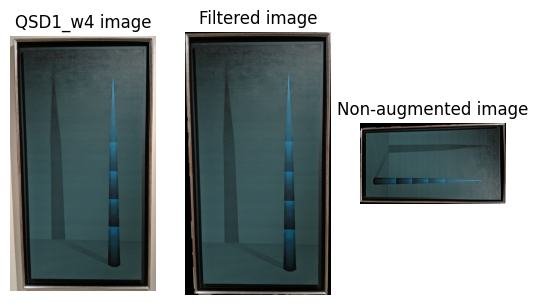

In [ ]:
# Plot some examples
img_number = 0


fig, axes = plt.subplots(1, 3)  # 1 fila, 3 columnas

# QSD1_w4 image
axes[0].imshow(QSD1_w4[img_number])
axes[0].set_title('QSD1_w4 image')
axes[0].axis('Off')

# Filtered image (background removal + denoise)
axes[1].imshow(QSD1_w4_filtered[img_number][0])
axes[1].set_title('Filtered image')
axes[1].axis('Off')

# Non-augmented image
axes[2].imshow(QSD1_w4_nonAugmented[img_number][0])
axes[2].set_title('Non-augmented image')
axes[2].axis('Off')

plt.show()
plt.close()

### b) Detect keyppoints and compute descriptors

In [46]:
import cv2

'''
flags = {
  DEFAULT = 0,
  DRAW_OVER_OUTIMG = 1,
  NOT_DRAW_SINGLE_POINTS = 2,
  DRAW_RICH_KEYPOINTS = 4
}
'''
def draw_keypoints(image, kp, flags=0):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img2 = cv2.drawKeypoints(gray_image, kp, None,(255,0,0),flags=flags)
    plt.imshow(img2) 

#### SIFT

In [47]:
import cv2

def sift_descriptor(image, params={}):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create(**params)
    kp, des = sift.detectAndCompute(img_gray, None)

    return (kp, des)

In [66]:
from tqdm import tqdm

sift_query = []
for picture in tqdm(QSD1_w4_filtered):
    for painting in picture:
        kp, des = sift_descriptor(painting)
        sift_query.append({'kp': kp, 'des': des})


sift_bd = []
for picture in tqdm(QSD1_w4_nonAugmented):
    for painting in picture:
        kp, des = sift_descriptor(painting)
        sift_bd.append({'kp': kp, 'des': des})

100%|██████████| 30/30 [00:21<00:00,  1.43it/s]


In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

#### SURF

In [ ]:
def surf_descriptor(image, params={}):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    surf = cv2.xfeatures2d.SURF_create(**params)
    kp, des = surf.detectAndCompute(img_gray, None)

    return (kp, des)

#### ORB

In [ ]:
def orb_descriptor(image, params={}):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(**params)
    kp, des = orb.detectAndCompute(img_gray, None)

    return (kp, des)

# Task 2

### a) Find tentative matches based on similarity of local appearance and verify matches 

### b) Implement a system to discard queries not in the data set (unknowns)

# Task 3

### a) Evaluate system based on keypoint descriptors on QSD1-W4

### b) Compare your best query system from previous week on QSD1-W4

# Task 4

### a) Create pkl file